import Library

In [1]:
## single frame analysis: whether there are large spatta?
# calculate the center position from image : sigle frame
import cv2
import numpy as np
import glob
import os
import csv
from matplotlib import pyplot as plt
import time
from numpy import dtype,uint8
import math

Cropping

#Get Center Position

In [68]:
DATE = "20221020"

In [71]:
def check_center(div,sec,date=DATE,ret=True):
  #load data
  if date == "20220401":
    path = r"C:\Users\Furukawa\Documents\TechAssistant\Video\{date}\video\220401_xiQ_{div}-{sec}.avi".format(date=date,div=div,sec=sec)
  if date == "20220603":
    path = r"C:\Users\Furukawa\Documents\TechAssistant\Video\{date}\video\xiQ_{date}_{div}-{sec}.avi".format(date=date,div=div,sec=sec)
  if date == "20221020":
    div = (div-1)*2
    idx = div+sec+20
    path = r"C:\Users\Furukawa\Documents\TechAssistant\Video\{date}\video\XIMEA_221020_{idx}_trim.avi".format(date=date,idx=idx)
  cap = cv2.VideoCapture(path)

  #画像の保存ディレクトリ
  #dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_22_trim/processed'
  if date == "20220401" or date == "20220603":
    save_dir=r'C:\Users\Furukawa\Documents\TechAssistant\dataset\imgs\{date}\{div}_{sec}\center'.format(date=date,div=div,sec=sec)
    print("{}-{} progressing".format(div,sec))
  if date == "20221020":
    save_dir=r'C:\Users\Furukawa\Documents\TechAssistant\dataset\imgs\{date}\{idx}\center'.format(date=date,idx=idx)
    print("{} progressing".format(idx))
  if not os.path.exists(save_dir):
    os.makedirs(save_dir)


  #center position
  X = []
  Y = []
  count = 0
  #calculate features
  #get image frames
  while ret :
      count += 1
      #フレーム情報取得
      ret, img = cap.read()
      if ret == False:
        break

      #img = raw_img[yg-length:yg+length,xg-length:xg+length,:]}
      #img = img[yg-length:yg+length,xg-length:xg+length]
      # グレースケールに変換する。
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

      #ret,thresh = cv2.threshold(gray,max/2,255,cv2.THRESH_BINARY)
      if date == "20220401" or date == "20220603":
        threshold = 100
      if date == "20221020":
        threshold = 80
      ret,thresh = cv2.threshold(gray,threshold,255,cv2.THRESH_BINARY)
      #find contours
      contours, hierarchy = cv2.findContours(np.array(thresh,dtype=uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


      Area = []
      #detect laser area
      if (bool(contours)==True):
        #面積(px*px)
        for j in contours:
          area = cv2.contourArea(j)
          Area.append(area)

        if Area:
          ind = np.argmax(Area)
          cnt = contours[ind]

          mu=cv2.moments(cnt)
          if mu["m00"] > 0:
            #gravity center
            gx=int(mu["m10"]/mu["m00"])
            gy=int(mu["m01"]/mu["m00"])
            X.append(gx)
            Y.append(gy)
            if count % 50 == 0:
              cv2.circle(gray,(int(gx),int(gy)),3,color=(125,0,0),thickness=-1)
              cv2.imwrite(os.path.join(save_dir,f"{count:03d}.jpg"),gray)

  fig,ax = plt.subplots(2,1,figsize=(3,2),tight_layout = True)
  ax[0].plot(X)
  ax[0].set_title("X")
  ax[1].plot(Y)
  ax[1].set_title("Y")
  fig.show()

  x_center_mean = sum(X)/len(X)
  y_center_mean = sum(Y)/len(Y)
  print(f"Center position : ({x_center_mean},{y_center_mean})")
  return [int(x_center_mean),int(y_center_mean)]

21 progressing
Center position : (87.42241379310344,82.48275862068965)
22 progressing
Center position : (87.01492537313433,82.23507462686567)


C:\Users\Furukawa\AppData\Local\Temp\ipykernel_20420\1828425675.py:81: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


23 progressing
Center position : (87.06759098786829,81.69844020797227)
24 progressing
Center position : (87.00471698113208,82.31132075471699)
25 progressing
Center position : (86.88790560471976,82.19469026548673)
26 progressing
Center position : (87.58549222797927,80.33333333333333)
27 progressing
Center position : (87.65178571428571,80.75446428571429)
28 progressing
Center position : (87.88022284122563,79.93871866295265)
29 progressing
Center position : (87.48037676609106,80.53218210361068)
30 progressing
Center position : (87.69868995633188,80.27510917030568)
31 progressing
Center position : (89.07865168539325,79.30337078651685)
32 progressing
Center position : (87.53627311522048,79.72688477951635)
33 progressing
Center position : (87.79084967320262,80.07843137254902)
34 progressing
Center position : (88.16236162361623,79.65313653136532)
35 progressing
Center position : (88.50119904076739,79.1630695443645)
36 progressing
Center position : (88.02843601895735,79.54028436018957)
37 prog

C:\Users\Furukawa\AppData\Local\Temp\ipykernel_20420\1828425675.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = plt.subplots(2,1,figsize=(3,2),tight_layout = True)


Center position : (88.24486571879937,78.21800947867298)
42 progressing
Center position : (87.55744680851063,80.2595744680851)
43 progressing
Center position : (87.51052631578948,80.3)
44 progressing
Center position : (87.82344213649851,79.36350148367953)


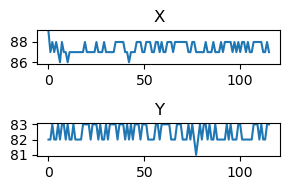

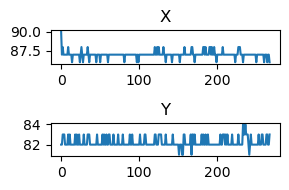

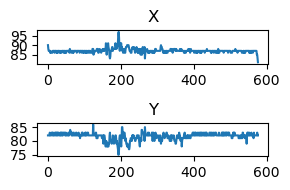

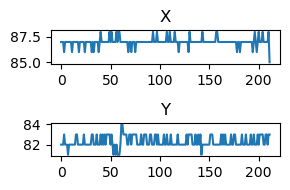

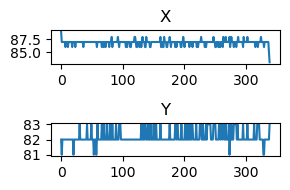

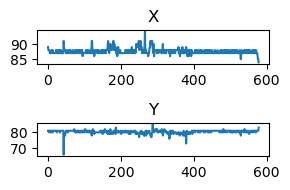

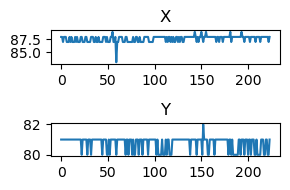

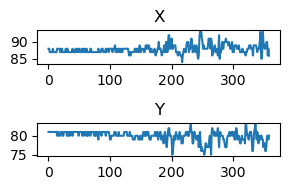

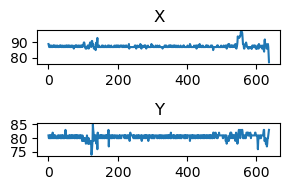

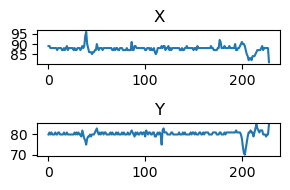

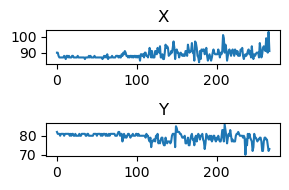

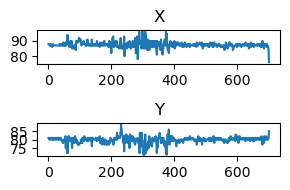

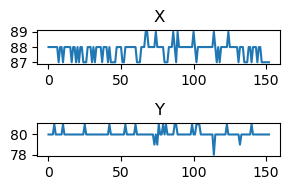

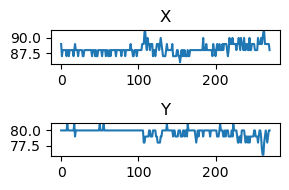

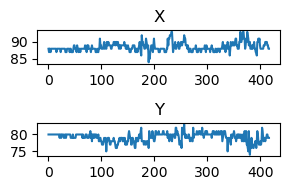

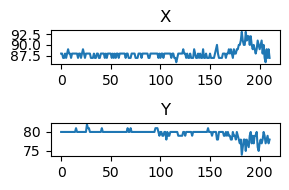

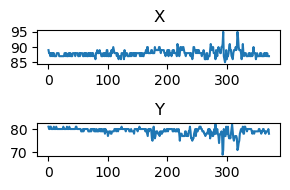

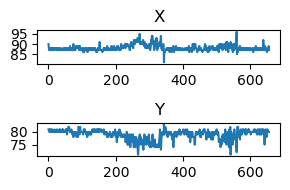

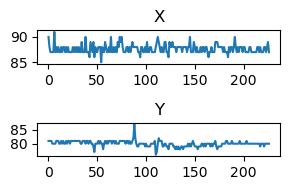

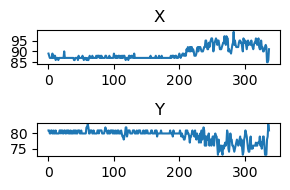

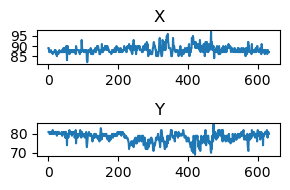

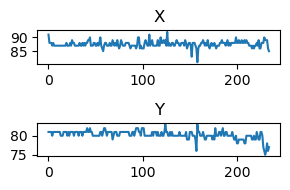

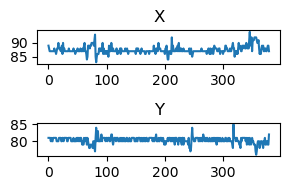

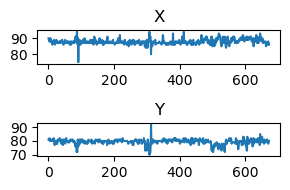

In [72]:
Centers = []
for i in range(1,13):
    for j in range(1,3):
        center = check_center(div=i,sec=j,date=DATE)
        Centers.append(center)

C:\Users\Furukawa\AppData\Local\Temp\ipykernel_20420\1538030143.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


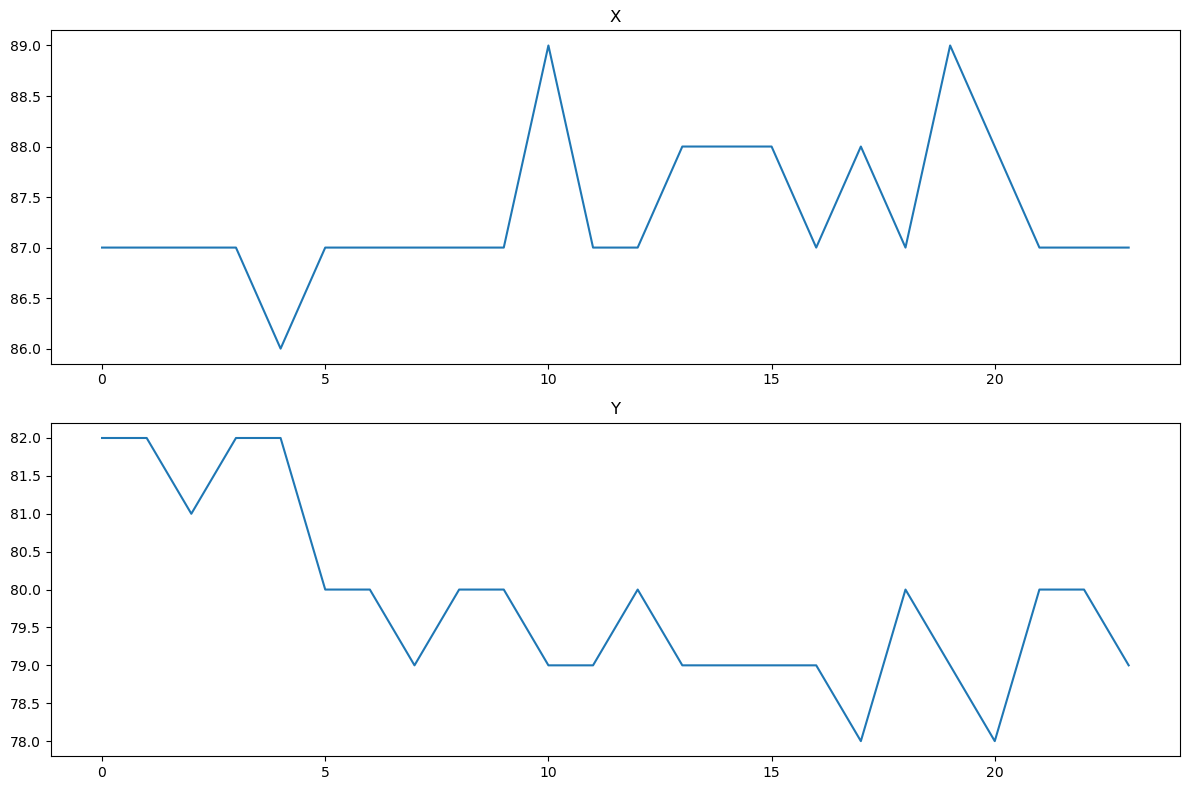

In [73]:
Centers = np.array(Centers)
fig,ax = plt.subplots(2,1,figsize=(12,8),tight_layout = True)
ax[0].plot(Centers[:,0])
ax[0].set_title("X")
ax[1].plot(Centers[:,1])
ax[1].set_title("Y")
fig.show()

#Cropping Imgs

In [74]:
def crop(div,sec,center,width = 80,height = 80,date=DATE,ret=True):
  #load data
  if date == "20220401":
    path = r"C:\Users\Furukawa\Documents\TechAssistant\Video\{date}\video\220401_xiQ_{div}-{sec}.avi".format(date=date,div=div,sec=sec)
  if date == "20220603":
    path = r"C:\Users\Furukawa\Documents\TechAssistant\Video\{date}\video\xiQ_{date}_{div}-{sec}.avi".format(date=date,div=div,sec=sec)
  if date == "20221020":
    div = (div-1)*2
    idx = div+sec+20
    path = r"C:\Users\Furukawa\Documents\TechAssistant\Video\{date}\video\XIMEA_221020_{idx}_trim.avi".format(date=date,idx=idx)
  cap = cv2.VideoCapture(path)

  #画像の保存ディレクトリ
  #dst_img_dir='/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/XIMEA_221020_22_trim/processed'
  if date == "20220401" or date == "20220603":
    save_dir=r'C:\Users\Furukawa\Documents\TechAssistant\dataset\imgs\{date}\{div}_{sec}\crop'.format(date=date,div=div,sec=sec)
    print("{}-{} progressing".format(div,sec))
  if date == "20221020":
    save_dir=r'C:\Users\Furukawa\Documents\TechAssistant\dataset\imgs\{date}\{idx}\crop'.format(date=date,idx=idx)
    print("{} progressing".format(idx))
  if not os.path.exists(save_dir):
    os.makedirs(save_dir)


  #center position
  [x,y] = center
  x_min = int(center[0] - width/2)
  y_min = int(center[1] - height/2)
  x_max = int(center[0] + width/2)
  y_max = int(center[1] + height/2)
  count = 0
  count_error = 0
  #calculate features
  #get image frames
  while ret :
      count += 1
      #フレーム情報取得
      ret, img = cap.read()
      if ret == False:
        break

      #img = raw_img[yg-length:yg+length,xg-length:xg+length,:]}
      #img = img[yg-length:yg+length,xg-length:xg+length]
      # グレースケールに変換する。
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      gray = gray[y_min:y_max,x_min:x_max]

      cv2.imwrite(os.path.join(save_dir,f"{count:03d}.jpg"),gray)
      if gray.shape != (80,80):
        count_error+=1
  
  print("Error : {}".format(count_error))


In [75]:
idx = [k for k in range(0,24)]
count = 0
for i in range(1,13):
    for j in range(1,3):
        crop(div=i,sec=j,center=Centers[idx[count]],width = 80,height = 80,date=DATE,ret=True)
        count += 1

0-1 progressing
Error : 0
0-2 progressing
Error : 0
2-1 progressing
Error : 0
2-2 progressing
Error : 0
4-1 progressing
Error : 0
4-2 progressing
Error : 0
6-1 progressing
Error : 0
6-2 progressing
Error : 0
8-1 progressing
Error : 0
8-2 progressing
Error : 0
10-1 progressing
Error : 0
10-2 progressing
Error : 0
12-1 progressing
Error : 0
12-2 progressing
Error : 0
14-1 progressing
Error : 0
14-2 progressing
Error : 0
16-1 progressing
Error : 0
16-2 progressing
Error : 0
18-1 progressing
Error : 0
18-2 progressing
Error : 0
20-1 progressing
Error : 0
20-2 progressing
Error : 0
22-1 progressing
Error : 0
22-2 progressing
Error : 0


##Check num of files in the diectory

In [81]:
def check_num(div,sec,date=DATE):
    if date == "20220401" or date == "20220603":
        src_img_dir=r'C:\Users\Furukawa\Documents\TechAssistant\dataset\imgs\{date}\{div}_{sec}\crop'.format(date=date,div=div,sec=sec)
        num_photo = sum(os.path.isfile(os.path.join(src_img_dir,name)) for name in os.listdir(src_img_dir))
        print(f"{div}-{sec} has {num_photo} files")
    if date == "20221020":
        idx = (div-1)*2 + sec + 20
        src_img_dir=r'C:\Users\Furukawa\Documents\TechAssistant\dataset\imgs\{date}\{idx}\crop'.format(date=date,idx=idx)
        num_photo = sum(os.path.isfile(os.path.join(src_img_dir,name)) for name in os.listdir(src_img_dir))
        print(f"{idx} has {num_photo} files")

In [82]:
for i in range(1,13):
    for j in range(1,3):
        check_num(div=i,sec=j,date=DATE)

21 has 244 files
22 has 448 files
23 has 895 files
24 has 245 files
25 has 448 files
26 has 863 files
27 has 235 files
28 has 430 files
29 has 857 files
30 has 233 files
31 has 312 files
32 has 880 files
33 has 236 files
34 has 434 files
35 has 866 files
36 has 240 files
37 has 440 files
38 has 883 files
39 has 240 files
40 has 442 files
41 has 889 files
42 has 242 files
43 has 447 files
44 has 892 files
